In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, matthews_corrcoef, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, roc_auc_score, matthews_corrcoef, confusion_matrix
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [90]:
df = pd.read_csv(r'/Users/mac/Desktop/MrFrank/churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [3]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [4]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [5]:
df.shape

(28382, 21)

In [53]:
df['vintage'].unique

<bound method Series.unique of 0        2101
1        2348
2        2194
3        2329
4        1579
         ... 
28377    2325
28378    1537
28379    2376
28380    1745
28381    1175
Name: vintage, Length: 28382, dtype: int64>

In [7]:
df['city'].unique

<bound method Series.unique of 0         187.0
1           NaN
2         146.0
3        1020.0
4        1494.0
          ...  
28377    1020.0
28378    1046.0
28379    1096.0
28380    1219.0
28381    1232.0
Name: city, Length: 28382, dtype: float64>

In [8]:
df['branch_code'].unique

<bound method Series.unique of 0         755
1        3214
2          41
3         582
4         388
         ... 
28377    1207
28378     223
28379     588
28380     274
28381     474
Name: branch_code, Length: 28382, dtype: int64>

In [91]:
df = df.drop(columns = ['customer_id', 'vintage', 'city', 'customer_nw_category', 'branch_code', 'last_transaction'])

In [92]:
df.head()

,age,gender,dependents,occupation,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,66,Male,0.0,self_employed,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,35,Male,0.0,self_employed,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,31,Male,0.0,salaried,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,90,NaN,NaN,self_employed,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,42,Male,2.0,self_employed,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [93]:
df.isnull().sum()

age                                  0
gender                             525
dependents                        2463
occupation                          80
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [94]:
df.dropna(inplace = True)

In [95]:
df.isnull().sum()

age                               0
gender                            0
dependents                        0
occupation                        0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [96]:
df.shape

(25556, 15)

In [97]:
df.dtypes

age                                 int64
gender                             object
dependents                        float64
occupation                         object
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [16]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df['occupation'].unique()

array(['self_employed', 'salaried', 'retired', 'student', 'company'],
      dtype=object)

In [18]:
df['churn'].unique()

array([0, 1])

In [98]:
df.isnull().sum()

age                               0
gender                            0
dependents                        0
occupation                        0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,25556.0,47.796330,16.844648,1.00,36.0000,46.000,60.0000,90.00
dependents,25556.0,0.351581,1.003575,0.00,0.0000,0.000,0.0000,52.00
current_balance,25556.0,6968.593618,21128.545940,-5503.96,1800.3850,3297.225,6602.4200,1398486.42
previous_month_end_balance,25556.0,7068.607865,21810.293753,-3145.38,1920.2000,3389.065,6632.7825,1398486.42
average_monthly_balance_prevQ,25556.0,7039.335278,20309.111392,1428.69,2194.6775,3543.275,6648.4600,1398486.42
average_monthly_balance_prevQ2,25556.0,6625.873648,18559.291381,-16506.10,1848.0450,3373.880,6507.8475,1389626.93
current_month_credit,25556.0,3461.078114,80516.188873,0.01,0.3300,0.630,714.8900,12269845.39
previous_month_credit,25556.0,3321.586551,30315.466338,0.01,0.3300,0.660,809.4775,2361808.29
current_month_debit,25556.0,3644.590994,53302.143839,0.01,0.4300,128.920,1417.6200,7637857.36
previous_month_debit,25556.0,3325.476728,23564.831984,0.01,0.4300,143.010,1428.5925,1414168.06


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


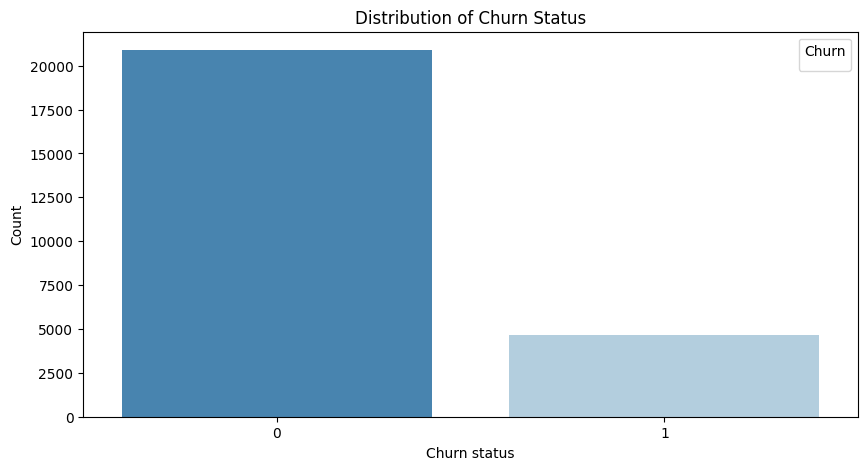

In [100]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='churn', palette="Blues_r")
plt.title("Distribution of Churn Status")
plt.xlabel("Churn status")
plt.ylabel("Count")
plt.legend(title='Churn')
plt.show()

#there is a high level of imbalance in the dependent variable as expected in churn dataset, this justifies the reason to use different upsampling techniques applied later as the analysis continues

In [101]:
df.columns

Index(['age', 'gender', 'dependents', 'occupation', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

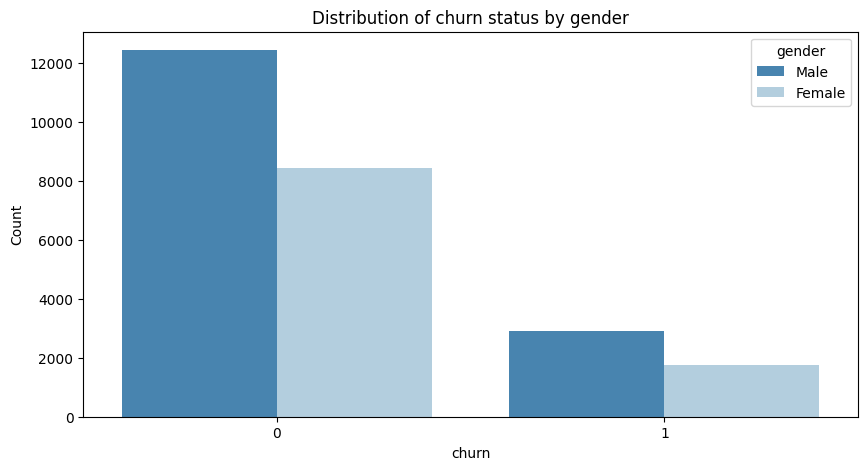

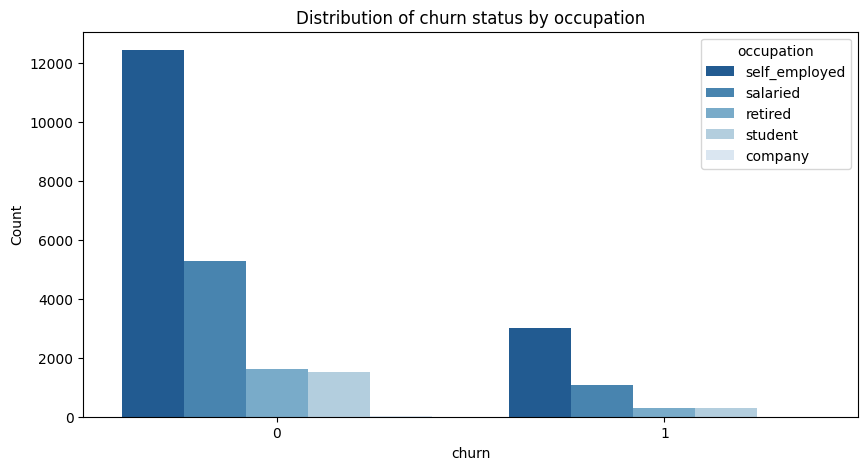

In [102]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='churn', palette="Blues_r", hue='gender')
plt.title("Distribution of churn status by gender")
plt.xlabel("churn")
plt.ylabel("Count")
plt.legend(title='gender')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='churn', palette="Blues_r", hue='occupation')
plt.title("Distribution of churn status by occupation")
plt.xlabel("churn")
plt.ylabel("Count")
plt.legend(title='occupation')
plt.show()

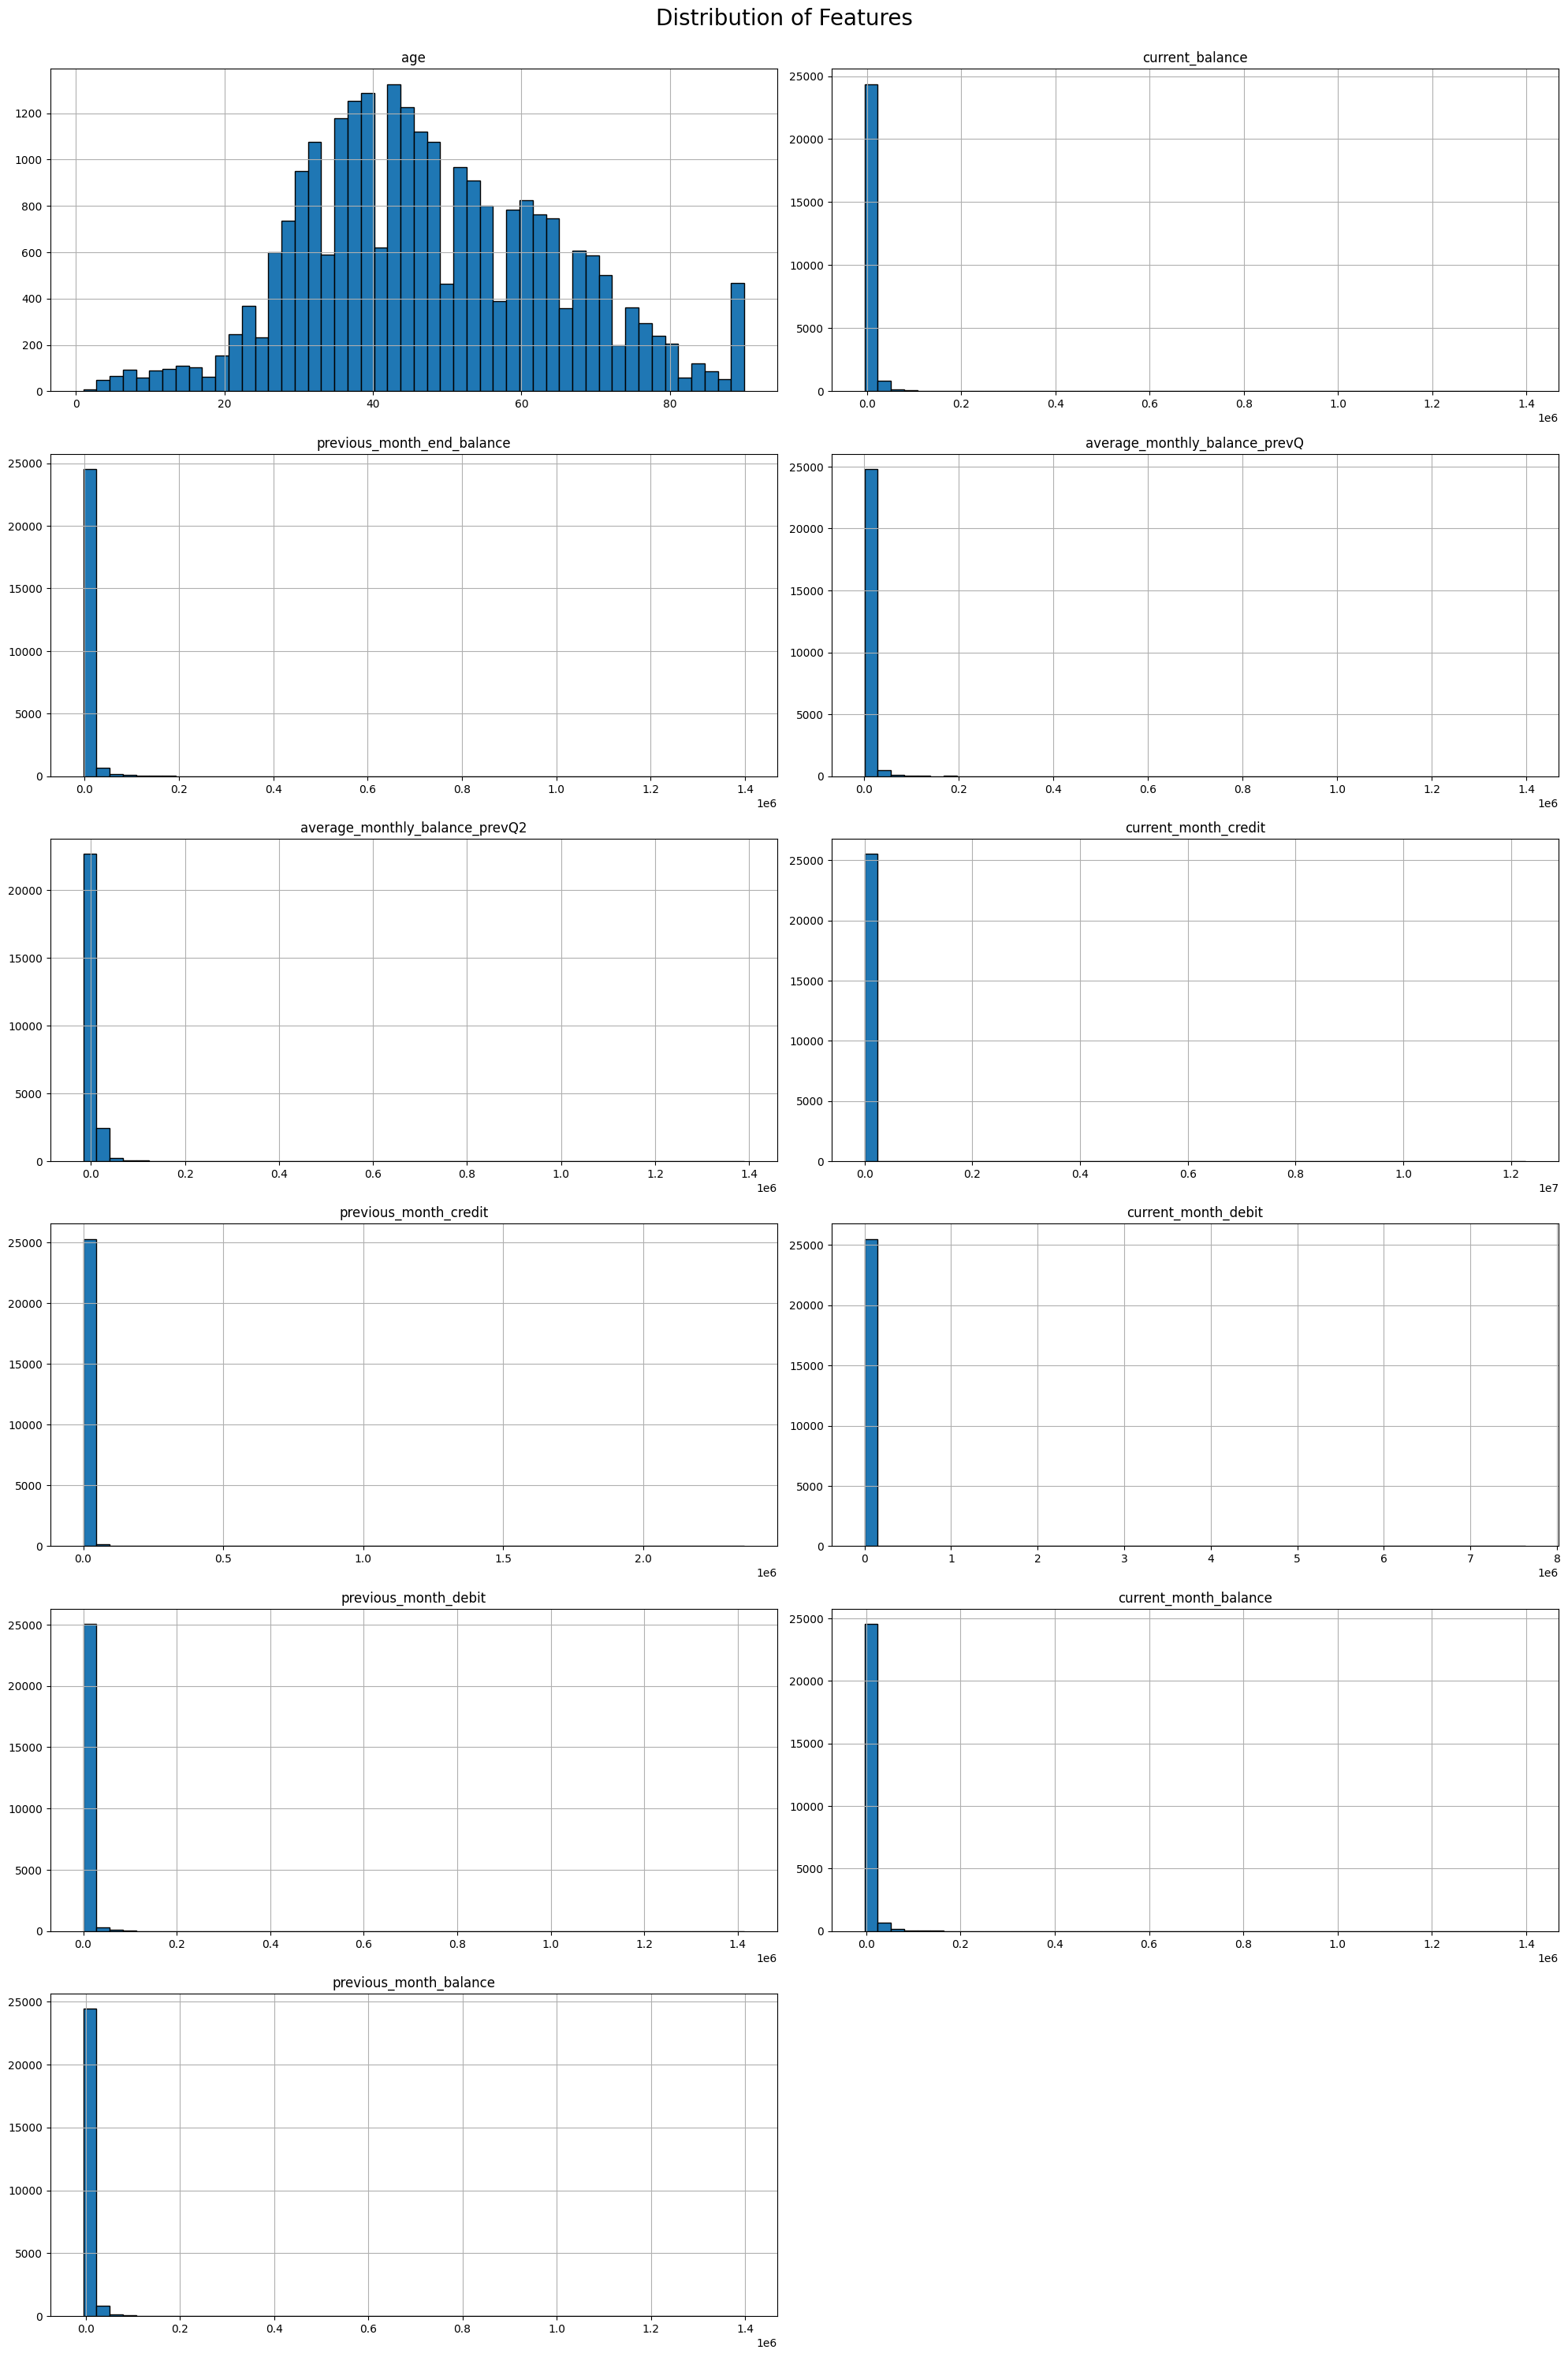

In [103]:
#Plotting the independent variables to know their distribution
num_columns = 2

df[['age',
       'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance',
       ]].hist(bins=50, figsize=(20, 40), layout=(int(len(df.columns)/num_columns)+1, num_columns), edgecolor='black')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Distribution of Features', fontsize=20)
plt.show()

while most of the features are rightly skewed, only 'age' seems to be normally distributed while 'last_transaction' is left skewed. This distributions suggest the presence of extreme values in the dataset. 

In [34]:
df.head(2)

,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
4,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


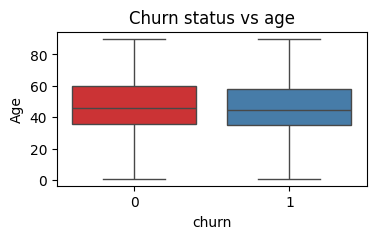

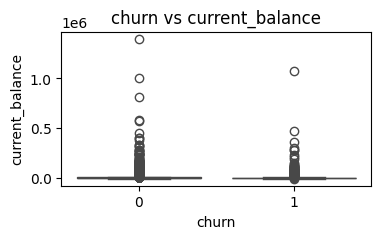

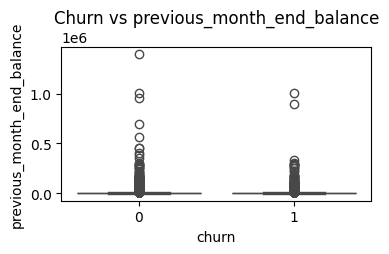

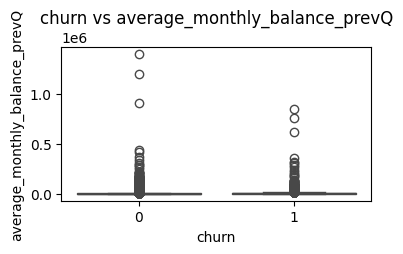

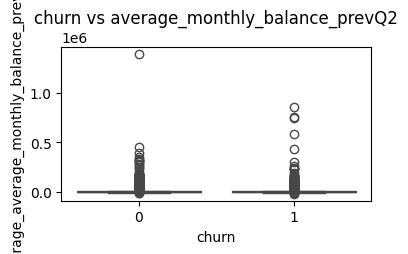

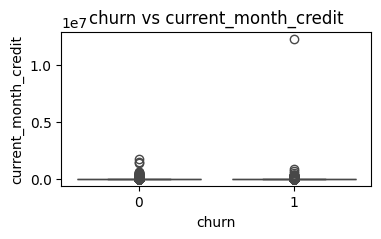

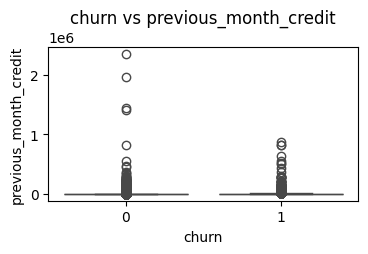

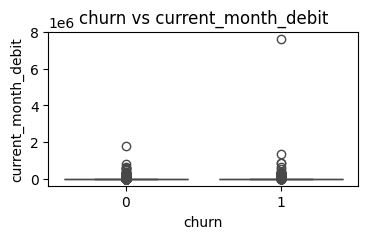

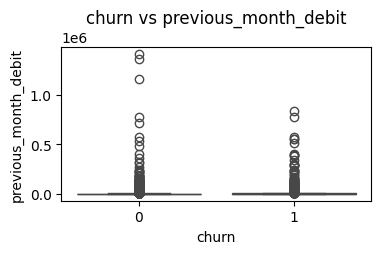

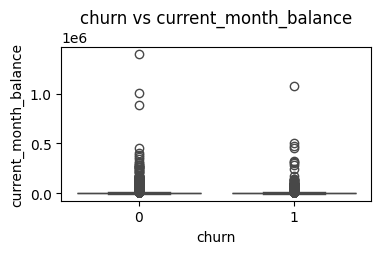

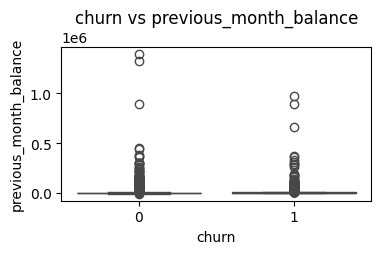

In [104]:
plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='age', data=df, palette='Set1')
plt.title('Churn status vs age')
plt.xlabel('churn')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='current_balance', data=df, palette='Set1')
plt.title('churn vs current_balance')
plt.xlabel('churn')
plt.ylabel('current_balance')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='previous_month_end_balance', data=df, palette='Set1')
plt.title('Churn vs previous_month_end_balance')
plt.xlabel('churn')
plt.ylabel('previous_month_end_balance')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='average_monthly_balance_prevQ', data=df, palette='Set1')
plt.title('churn vs average_monthly_balance_prevQ')
plt.xlabel('churn')
plt.ylabel('average_monthly_balance_prevQ')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='average_monthly_balance_prevQ2', data=df, palette='Set1')
plt.title('churn vs average_monthly_balance_prevQ2')
plt.xlabel('churn')
plt.ylabel('average_average_monthly_balance_prevQ2')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='current_month_credit', data=df, palette='Set1')
plt.title('churn vs current_month_credit')
plt.xlabel('churn')
plt.ylabel('current_month_credit')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='previous_month_credit', data=df, palette='Set1')
plt.title('churn vs previous_month_credit')
plt.xlabel('churn')
plt.ylabel('previous_month_credit')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='current_month_debit', data=df, palette='Set1')
plt.title('churn vs current_month_debit')
plt.xlabel('churn')
plt.ylabel('current_month_debit')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='previous_month_debit', data=df, palette='Set1')
plt.title('churn vs previous_month_debit')
plt.xlabel('churn')
plt.ylabel('previous_month_debit')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='current_month_balance', data=df, palette='Set1')
plt.title('churn vs current_month_balance')
plt.xlabel('churn')
plt.ylabel('current_month_balance')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='previous_month_balance', data=df, palette='Set1')
plt.title('churn vs previous_month_balance')
plt.xlabel('churn')
plt.ylabel('previous_month_balance')
plt.show()

The boxplots above shows the presence of extreme values in the continous columns, except age, all other features contains outlier. The next phase of the code deals with removing/replacing the outliers, making the dataset suitable for machine learning process

In [105]:
def replace_outliers_with_mean(df, feature_columns):
    
    df_cleaned = df.copy()
    
    for feature in feature_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_cleaned[feature].quantile(0.25)
        Q3 = df_cleaned[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Calculate the mean of the column
        mean_value = df_cleaned[feature].mean()
        
        # Replace outliers with the mean value
        df_cleaned[feature] = np.where(
            (df_cleaned[feature] < lower_bound) | (df_cleaned[feature] > upper_bound),
            mean_value,
            df_cleaned[feature]
        )
    
    return df_cleaned


In [106]:
features = [
    'current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ',
    'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit',
    'current_month_debit', 'previous_month_debit', 'current_month_balance', 'previous_month_balance'
]
df_cleaned = replace_outliers_with_mean(df, features)

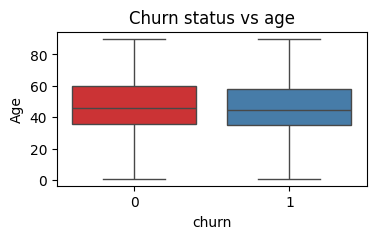

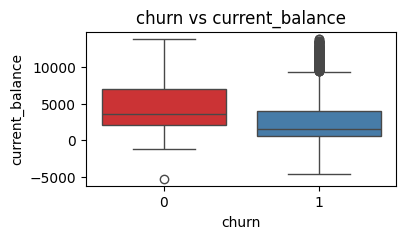

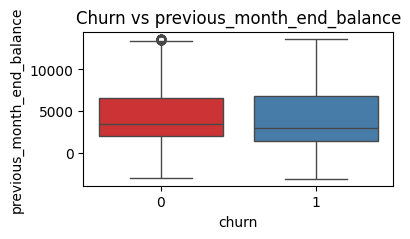

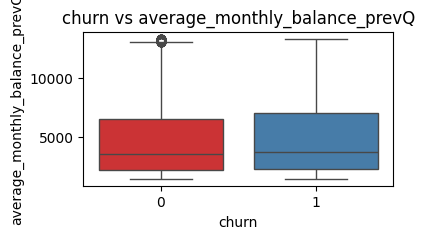

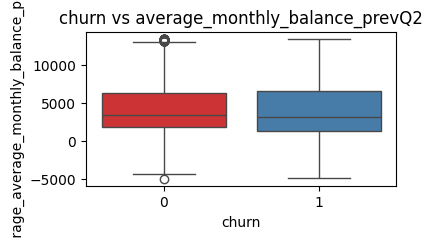

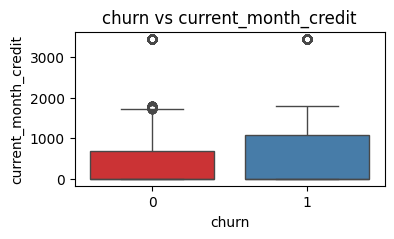

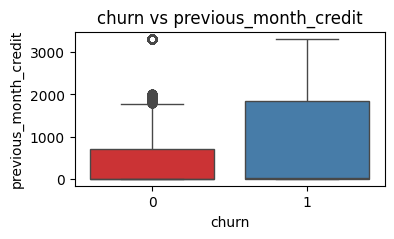

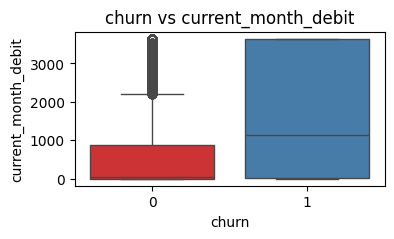

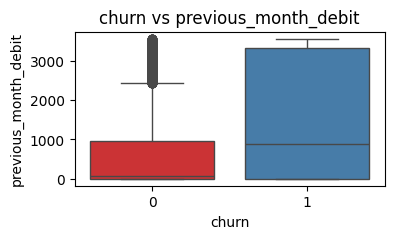

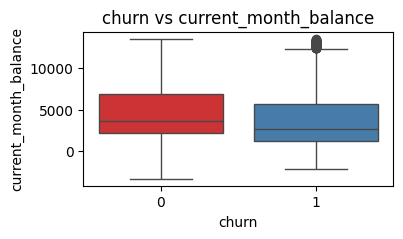

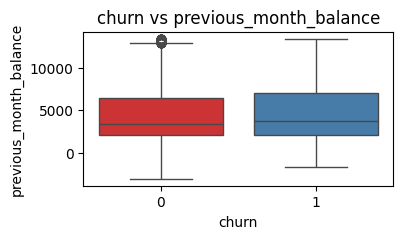

In [107]:
plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='age', data=df_cleaned, palette='Set1')
plt.title('Churn status vs age')
plt.xlabel('churn')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='current_balance', data=df_cleaned, palette='Set1')
plt.title('churn vs current_balance')
plt.xlabel('churn')
plt.ylabel('current_balance')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='previous_month_end_balance', data=df_cleaned, palette='Set1')
plt.title('Churn vs previous_month_end_balance')
plt.xlabel('churn')
plt.ylabel('previous_month_end_balance')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='average_monthly_balance_prevQ', data=df_cleaned, palette='Set1')
plt.title('churn vs average_monthly_balance_prevQ')
plt.xlabel('churn')
plt.ylabel('average_monthly_balance_prevQ')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='average_monthly_balance_prevQ2', data=df_cleaned, palette='Set1')
plt.title('churn vs average_monthly_balance_prevQ2')
plt.xlabel('churn')
plt.ylabel('average_average_monthly_balance_prevQ2')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='current_month_credit', data=df_cleaned, palette='Set1')
plt.title('churn vs current_month_credit')
plt.xlabel('churn')
plt.ylabel('current_month_credit')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='previous_month_credit', data=df_cleaned, palette='Set1')
plt.title('churn vs previous_month_credit')
plt.xlabel('churn')
plt.ylabel('previous_month_credit')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='current_month_debit', data=df_cleaned, palette='Set1')
plt.title('churn vs current_month_debit')
plt.xlabel('churn')
plt.ylabel('current_month_debit')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='previous_month_debit', data=df_cleaned, palette='Set1')
plt.title('churn vs previous_month_debit')
plt.xlabel('churn')
plt.ylabel('previous_month_debit')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='current_month_balance', data=df_cleaned, palette='Set1')
plt.title('churn vs current_month_balance')
plt.xlabel('churn')
plt.ylabel('current_month_balance')
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(x='churn', y='previous_month_balance', data=df_cleaned, palette='Set1')
plt.title('churn vs previous_month_balance')
plt.xlabel('churn')
plt.ylabel('previous_month_balance')
plt.show()

Here, the outliers have been removed

In [108]:
df_cleaned.columns

Index(['age', 'gender', 'dependents', 'occupation', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

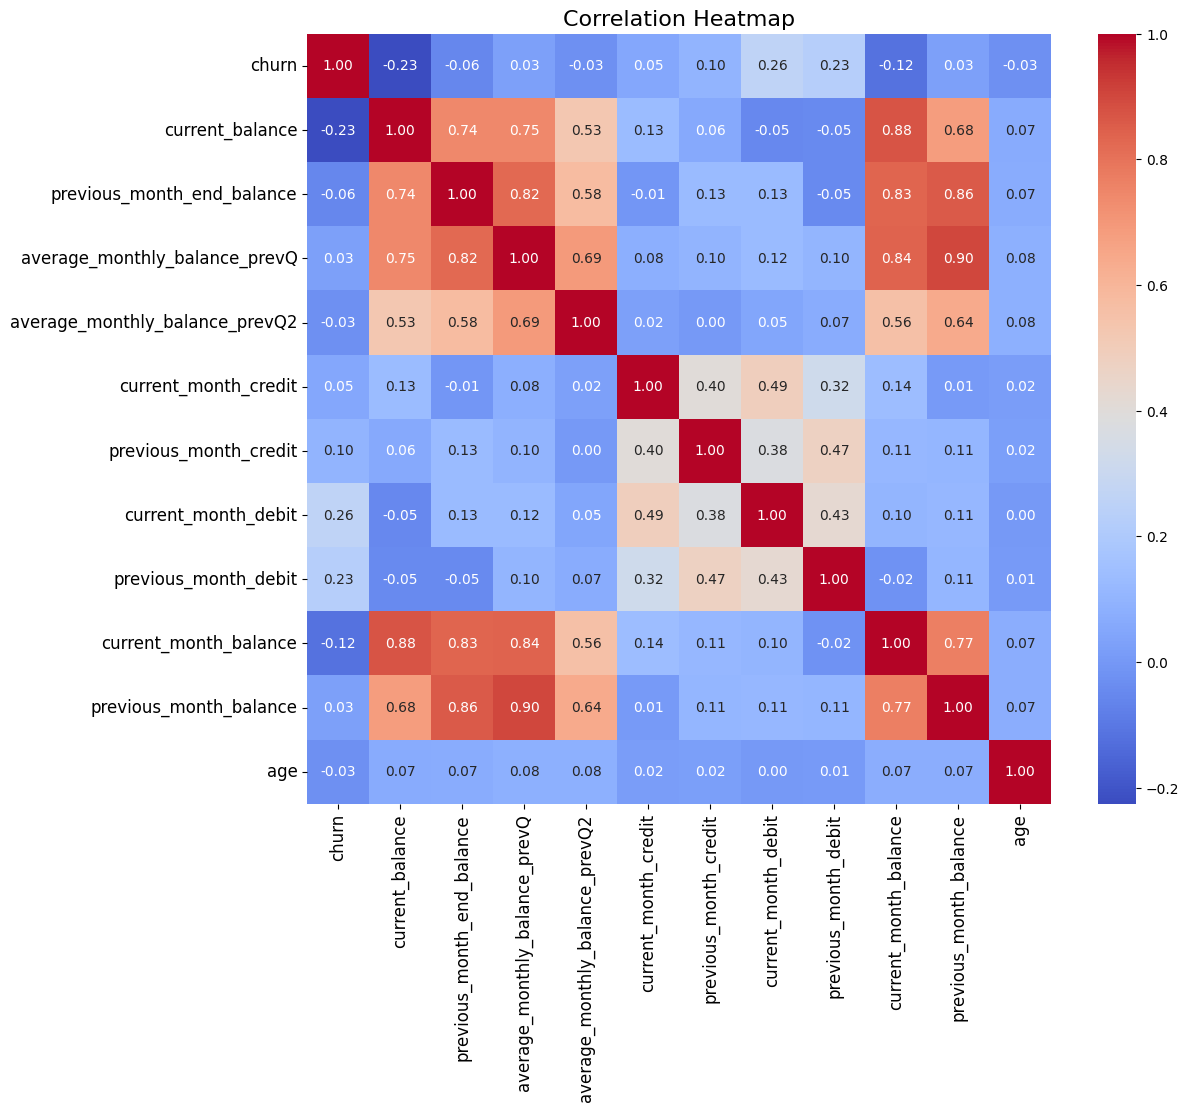

In [109]:
correlation_matrix = df_cleaned[['churn',
        'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'age',
       ]].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

plt.show()

In [110]:
#Manuel encoding

In [114]:
df_cleaned['gender'] = df_cleaned['gender'].replace({'Male': 1, 'Female': 0})
df_cleaned['occupation'] = df_cleaned['occupation'].replace({'self_employed':0, 'salaried':1, 'retired':2, 'student':3, 'company':4})

In [115]:
df_cleaned.dtypes

age                                 int64
gender                              int64
dependents                        float64
occupation                          int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#Split the data into training and testing sets
X = df_cleaned.drop(columns='churn')
y = df_cleaned['churn']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort DataFrame based on accuracy
results_df = results_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
  Gradient Boosting 86.443662  71.846435 42.167382    96.315789 63.728994  82.630411 48.067651
      Random Forest 86.384977  71.933086 41.523605    96.387560 63.264200  82.369679 47.700618
            XGBoost 85.582942  65.700483 43.776824    94.904306 64.456257  81.421340 45.717021
           AdaBoost 85.465571  69.325153 36.373391    96.411483 59.218346  82.309870 43.038115
                KNN 85.191706  65.938069 38.841202    95.526316 60.912699  76.442838 42.858094
Logistic Regression 84.350548  65.789474 29.506438    96.578947 53.382588  77.608451 36.756459


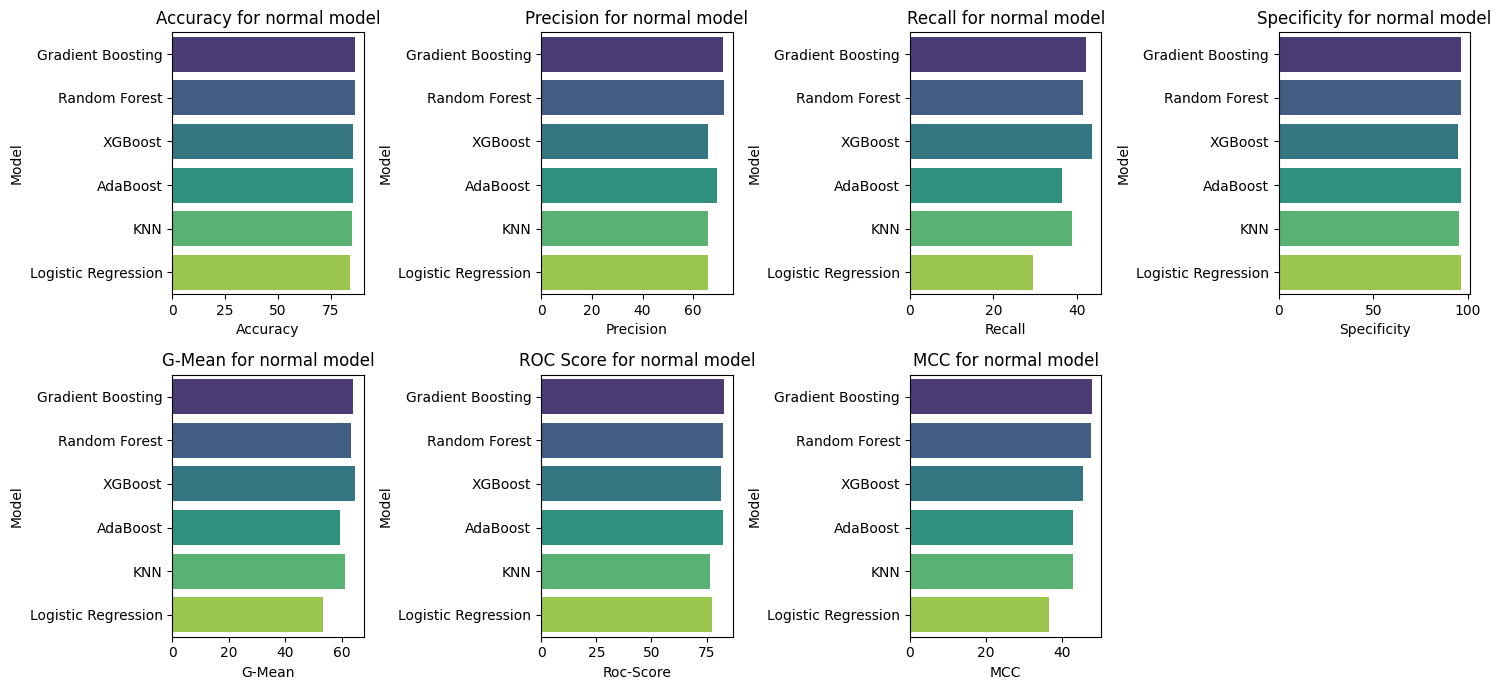

In [119]:
# Plot the results
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Accuracy for normal model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results_df, palette='viridis')
plt.title('Precision for normal model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results_df, palette='viridis')
plt.title('Recall for normal model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results_df, palette='viridis')
plt.title('Specificity for normal model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results_df, palette='viridis')
plt.title('G-Mean for normal model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results_df, palette='viridis')
plt.title('ROC Score for normal model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results_df, palette='viridis')
plt.title('MCC for normal model')

plt.tight_layout()
plt.show()

In [120]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results1 = []
for name, clf in classifiers.items():
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results1.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results1_df = pd.DataFrame(results1)

# Sort DataFrame based on accuracy
results1_df = results1_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results1_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest 83.802817  55.496829 56.330472    89.928230 71.173729  81.055263 45.992216
            XGBoost 83.411581  54.708520 52.360515    90.334928 68.774875  79.942168 43.434915
  Gradient Boosting 82.296557  51.272385 58.369099    87.631579 71.519062  80.686939 43.794696
           AdaBoost 80.066510  46.390041 59.978541    84.545455 71.210343  79.083452 40.501863
Logistic Regression 78.110329  43.297491 64.806867    81.076555 72.486671  77.868555 39.771183
                KNN 73.493740  36.672968 62.446352    75.956938 68.871138  74.187796 32.047673


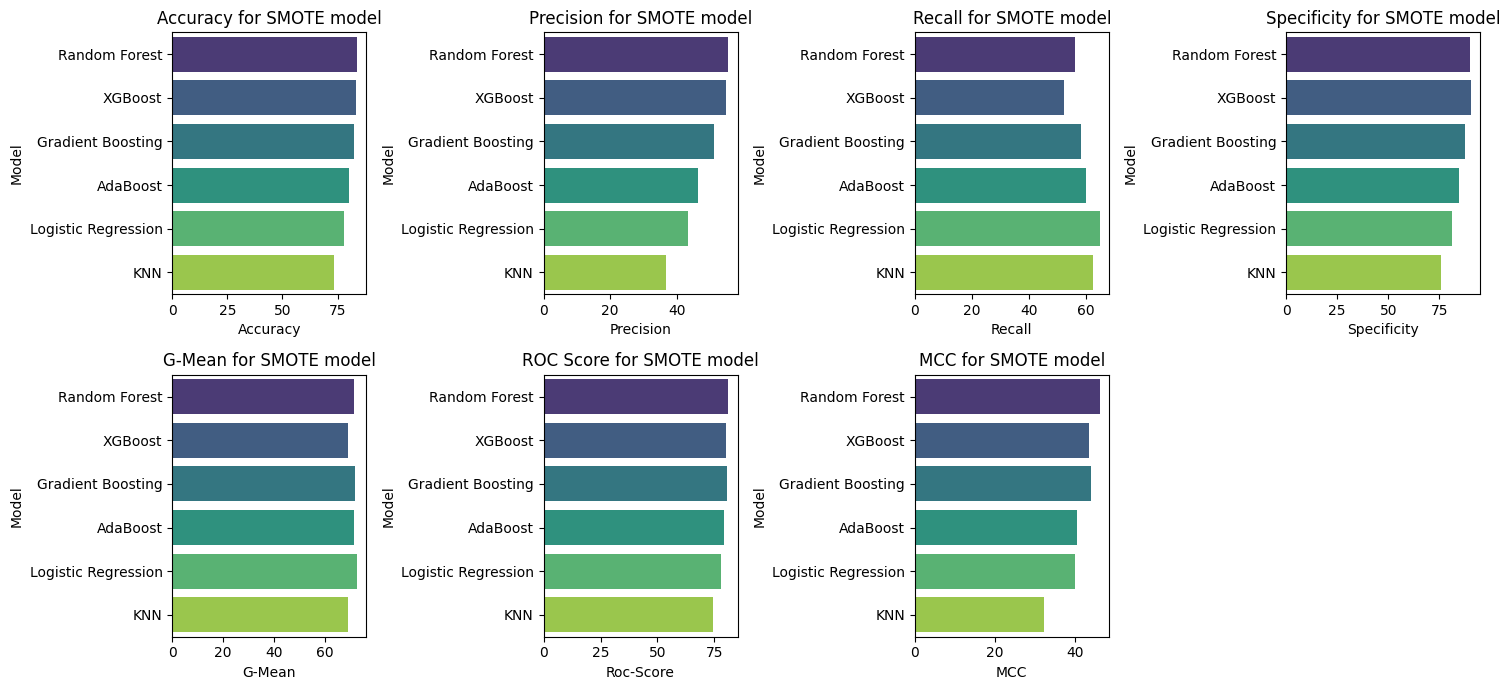

In [121]:
# Plot the results for SMOTE Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results1_df, palette='viridis')
plt.title('Accuracy for SMOTE model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results1_df, palette='viridis')
plt.title('Precision for SMOTE model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results1_df, palette='viridis')
plt.title('Recall for SMOTE model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results1_df, palette='viridis')
plt.title('Specificity for SMOTE model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results1_df, palette='viridis')
plt.title('G-Mean for SMOTE model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results1_df, palette='viridis')
plt.title('ROC Score for SMOTE model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results1_df, palette='viridis')
plt.title('MCC for SMOTE model')

plt.tight_layout()
plt.show()


In [122]:
from imblearn.over_sampling import BorderlineSMOTE

# Apply BorderlineSMOTE to balance the dataset
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')  
X_train_borderline_smote, y_train_borderline_smote = borderline_smote.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results2 = []
for name, clf in classifiers.items():
    clf.fit(X_train_borderline_smote, y_train_borderline_smote)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results2.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results2_df = pd.DataFrame(results2)

# Sort DataFrame based on accuracy
results2_df = results2_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results2_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest 82.922535  52.982811 56.223176    88.875598 70.688531  80.952587 44.081465
            XGBoost 82.355243  51.527495 54.291845    88.612440 69.360889  79.958160 42.050000
  Gradient Boosting 80.516432  47.377049 62.017167    84.641148 72.451392  80.816477 42.262854
           AdaBoost 78.482003  43.703148 62.553648    82.033493 71.634449  79.340642 39.200971
Logistic Regression 76.349765  40.710932 65.128755    78.851675 71.662483  77.347270 37.359623
                KNN 74.569640  38.354430 65.021459    76.698565 70.619067  75.058384 34.857943


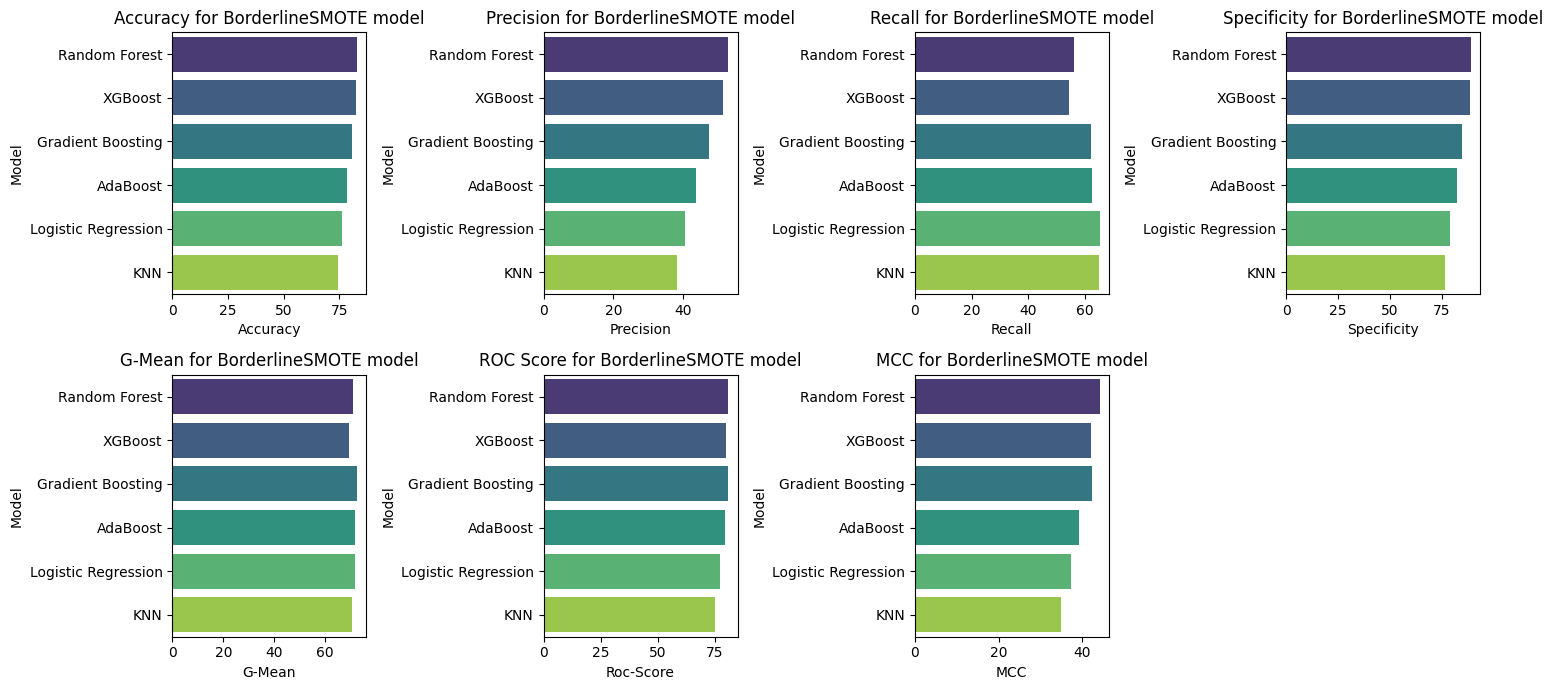

In [123]:
# Plot the results for SMOTE Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results2_df, palette='viridis')
plt.title('Accuracy for BorderlineSMOTE model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results2_df, palette='viridis')
plt.title('Precision for BorderlineSMOTE model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results2_df, palette='viridis')
plt.title('Recall for BorderlineSMOTE model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results2_df, palette='viridis')
plt.title('Specificity for BorderlineSMOTE model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results2_df, palette='viridis')
plt.title('G-Mean for BorderlineSMOTE model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results2_df, palette='viridis')
plt.title('ROC Score for BorderlineSMOTE model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results2_df, palette='viridis')
plt.title('MCC for BorderlineSMOTE model')

plt.tight_layout()
plt.show()


In [124]:
from imblearn.over_sampling import SVMSMOTE

# Apply SVMSMOTE to balance the dataset
svm_smote = SVMSMOTE(random_state=42)  
X_train_svm_smote, y_train_svm_smote = svm_smote.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results3 = []
for name, clf in classifiers.items():
    clf.fit(X_train_svm_smote, y_train_svm_smote)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results3.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results3_df = pd.DataFrame(results3)

# Sort DataFrame based on accuracy
results3_df = results3_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results3_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest 84.291862  56.972973 56.545064    90.478469 71.526994  81.857032 47.161652
  Gradient Boosting 83.568075  54.457364 60.300429    88.755981 73.157527  81.997582 47.186953
            XGBoost 83.568075  54.935622 54.935622    89.952153 70.296355  81.065646 44.887775
           AdaBoost 82.061815  50.709555 57.510730    87.535885 70.952467  80.256407 42.946258
Logistic Regression 78.755869  44.546742 67.489270    81.267943 74.058856  78.250739 42.103360
                KNN 77.660407  42.346939 62.339056    81.076555 71.093149  76.226372 37.829374


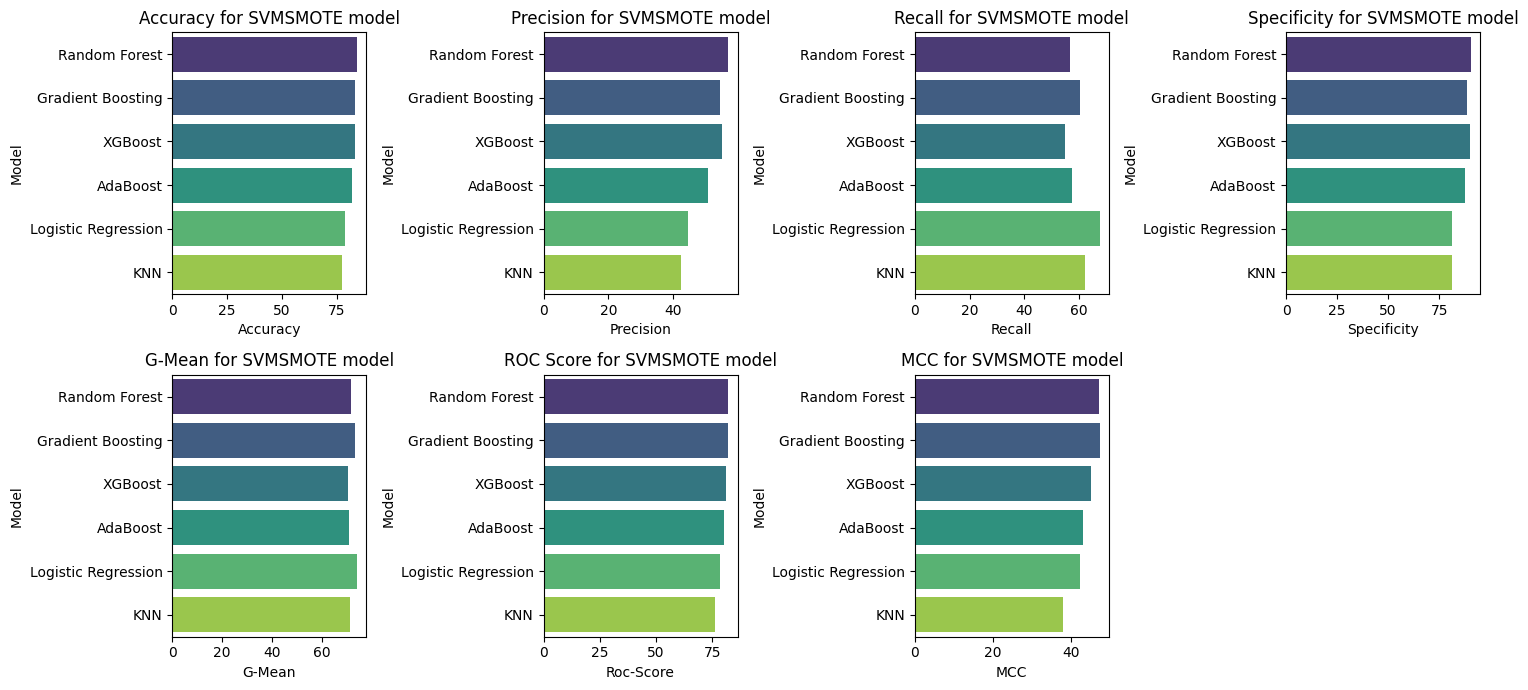

In [125]:
# Plot the results for SVMSMOTE Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results3_df, palette='viridis')
plt.title('Accuracy for SVMSMOTE model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results3_df, palette='viridis')
plt.title('Precision for SVMSMOTE model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results3_df, palette='viridis')
plt.title('Recall for SVMSMOTE model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results3_df, palette='viridis')
plt.title('Specificity for SVMSMOTE model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results3_df, palette='viridis')
plt.title('G-Mean for SVMSMOTE model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results3_df, palette='viridis')
plt.title('ROC Score for SVMSMOTE model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results3_df, palette='viridis')
plt.title('MCC for SVMSMOTE model')

plt.tight_layout()
plt.show()


In [126]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN to balance the dataset
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results4 = []
for name, clf in classifiers.items():
    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results4.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results4_df = pd.DataFrame(results4)

# Sort DataFrame based on accuracy
results4_df = results4_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results4_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest 81.729264  49.904031 55.793991    87.511962 69.875902  79.776950 41.506168
            XGBoost 81.709703  49.852507 54.399142    87.799043 69.110003  78.287292 40.813368
  Gradient Boosting 79.166667  44.675741 59.871245    83.468900 70.692198  79.495118 38.944208
           AdaBoost 77.190923  41.558442 61.802575    80.622010 70.587873  78.099164 36.847723
Logistic Regression 75.704225  39.987080 66.416309    77.775120 71.871666  76.942830 37.134691
                KNN 70.402973  33.852140 65.343348    71.531100 68.367255  73.643269 29.812289


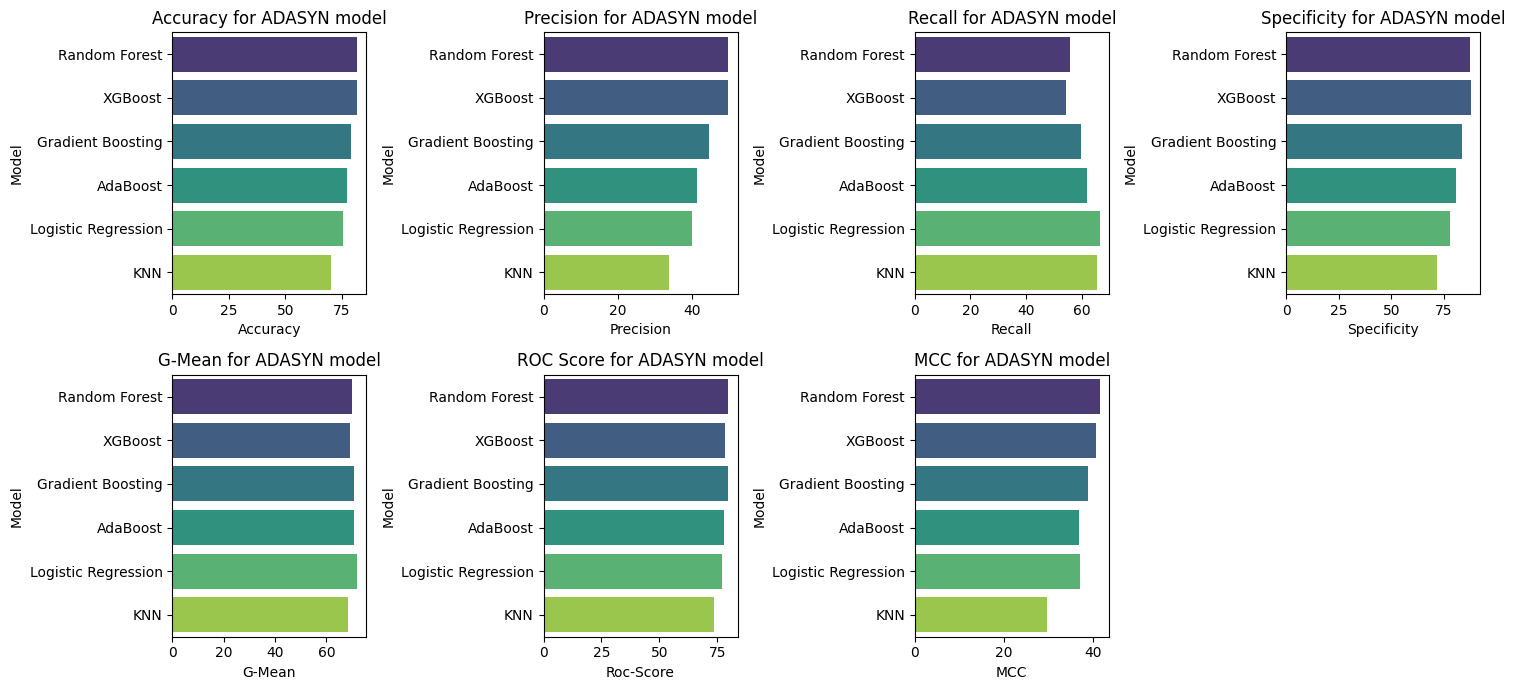

In [127]:
# Plot the results for SVMSMOTE Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results4_df, palette='viridis')
plt.title('Accuracy for ADASYN model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results4_df, palette='viridis')
plt.title('Precision for ADASYN model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results4_df, palette='viridis')
plt.title('Recall for ADASYN model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results4_df, palette='viridis')
plt.title('Specificity for ADASYN model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results4_df, palette='viridis')
plt.title('G-Mean for ADASYN model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results4_df, palette='viridis')
plt.title('ROC Score for ADASYN model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results4_df, palette='viridis')
plt.title('MCC for ADASYN model')

plt.tight_layout()
plt.show()


In [128]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Over-Sampling to balance the dataset
random_oversampler = RandomOverSampler(random_state=42)
X_train_random_oversampled, y_train_random_oversampled = random_oversampler.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results5 = []
for name, clf in classifiers.items():
    clf.fit(X_train_random_oversampled, y_train_random_oversampled)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results5.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results5_df = pd.DataFrame(results5)

# Sort DataFrame based on accuracy
results5_df = results5_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results5_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest 85.915493  65.497076 48.068670    94.354067 67.345931  82.060882 48.113053
            XGBoost 83.548513  54.473943 59.442060    88.923445 72.703458  80.819173 46.778296
  Gradient Boosting 81.005477  48.541511 69.635193    83.540670 76.271690  82.871725 46.718239
           AdaBoost 80.183881  47.002221 68.133047    82.870813 75.141474  82.101336 44.660112
Logistic Regression 77.992958  43.394935 68.025751    80.215311 73.869525  78.309521 41.227019
                KNN 73.376369  36.734694 63.733906    75.526316 69.380019  74.308992 32.596445


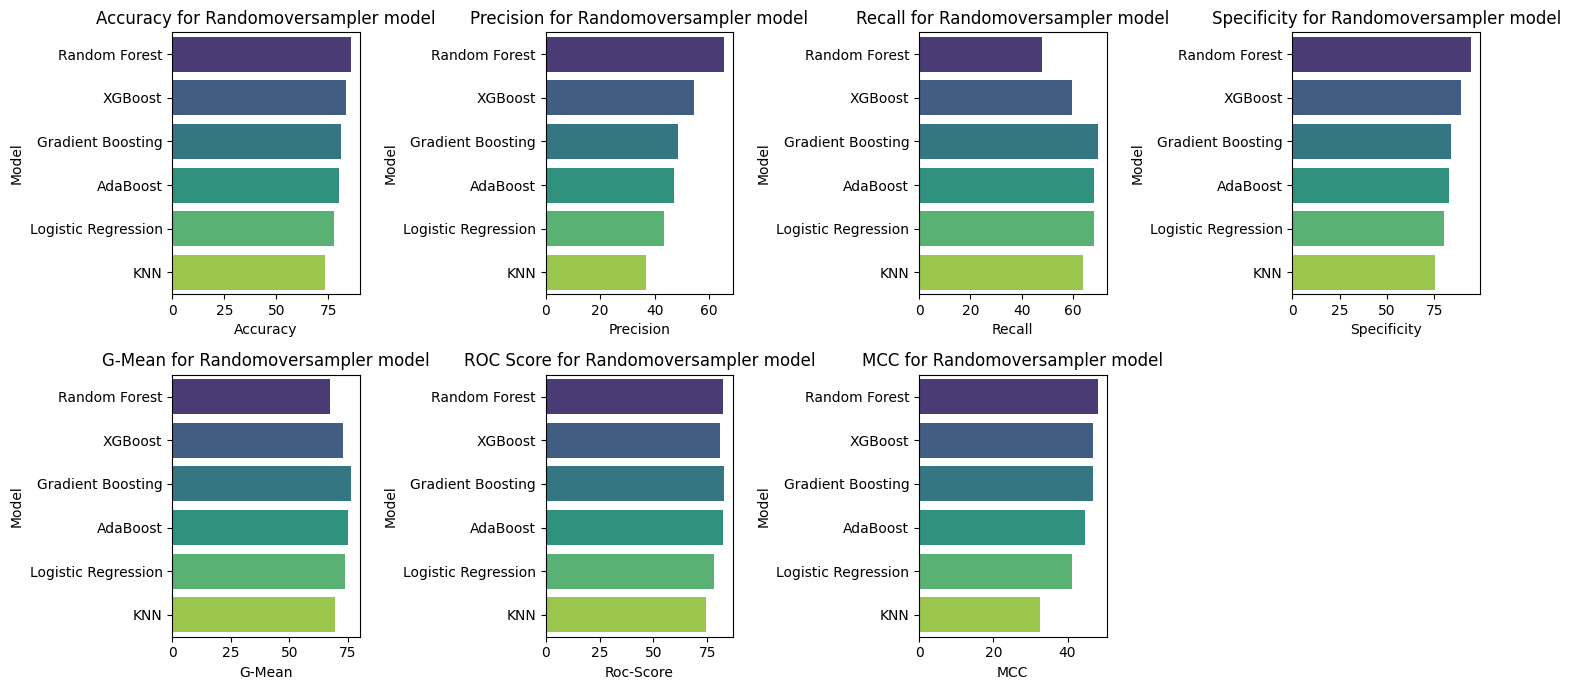

In [129]:
# Plot the results for SVMSMOTE Models
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results5_df, palette='viridis')
plt.title('Accuracy for Randomoversampler model')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results5_df, palette='viridis')
plt.title('Precision for Randomoversampler model')

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results5_df, palette='viridis')
plt.title('Recall for Randomoversampler model')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results5_df, palette='viridis')
plt.title('Specificity for Randomoversampler model')

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results5_df, palette='viridis')
plt.title('G-Mean for Randomoversampler model')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results5_df, palette='viridis')
plt.title('ROC Score for Randomoversampler model')

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results5_df, palette='viridis')
plt.title('MCC for Randomoversampler model')

plt.tight_layout()
plt.show()


Confusion Matrices for KNN:


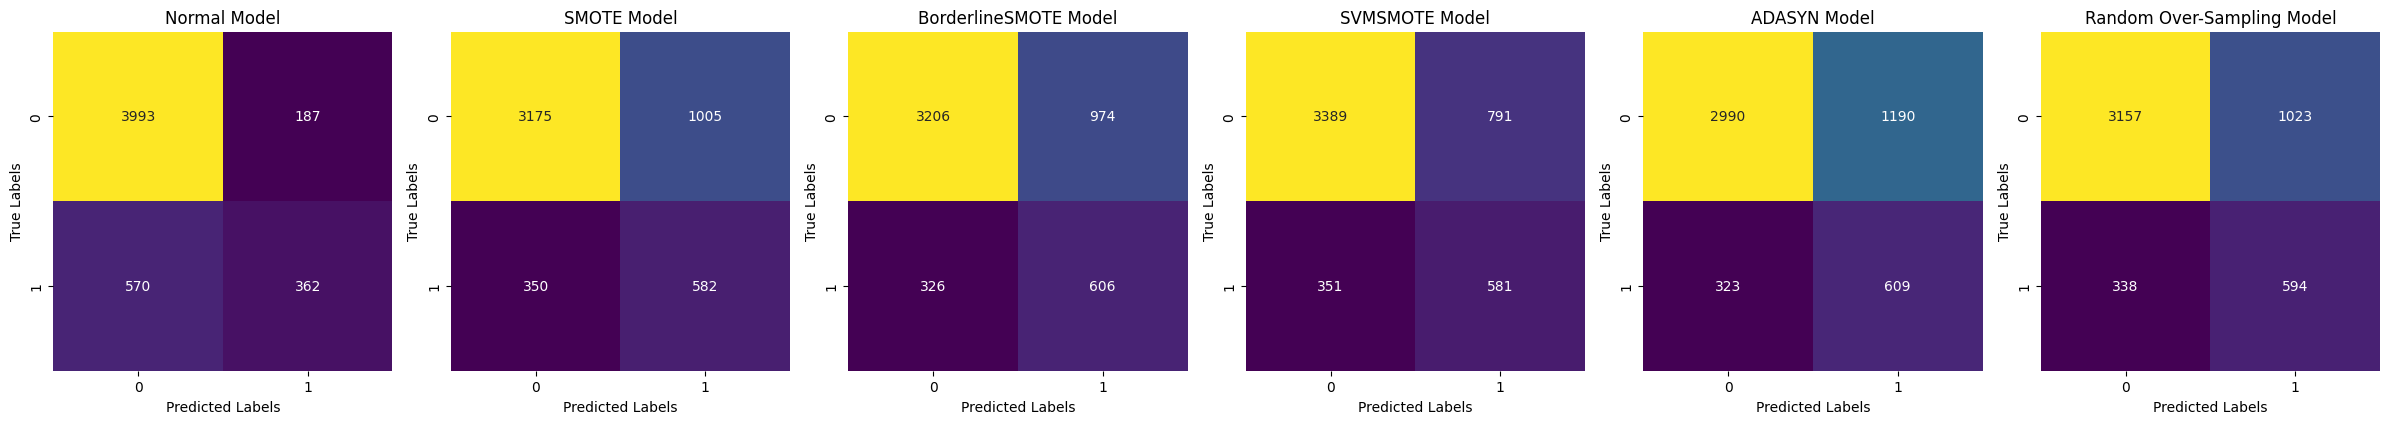

Confusion Matrices for Logistic Regression:


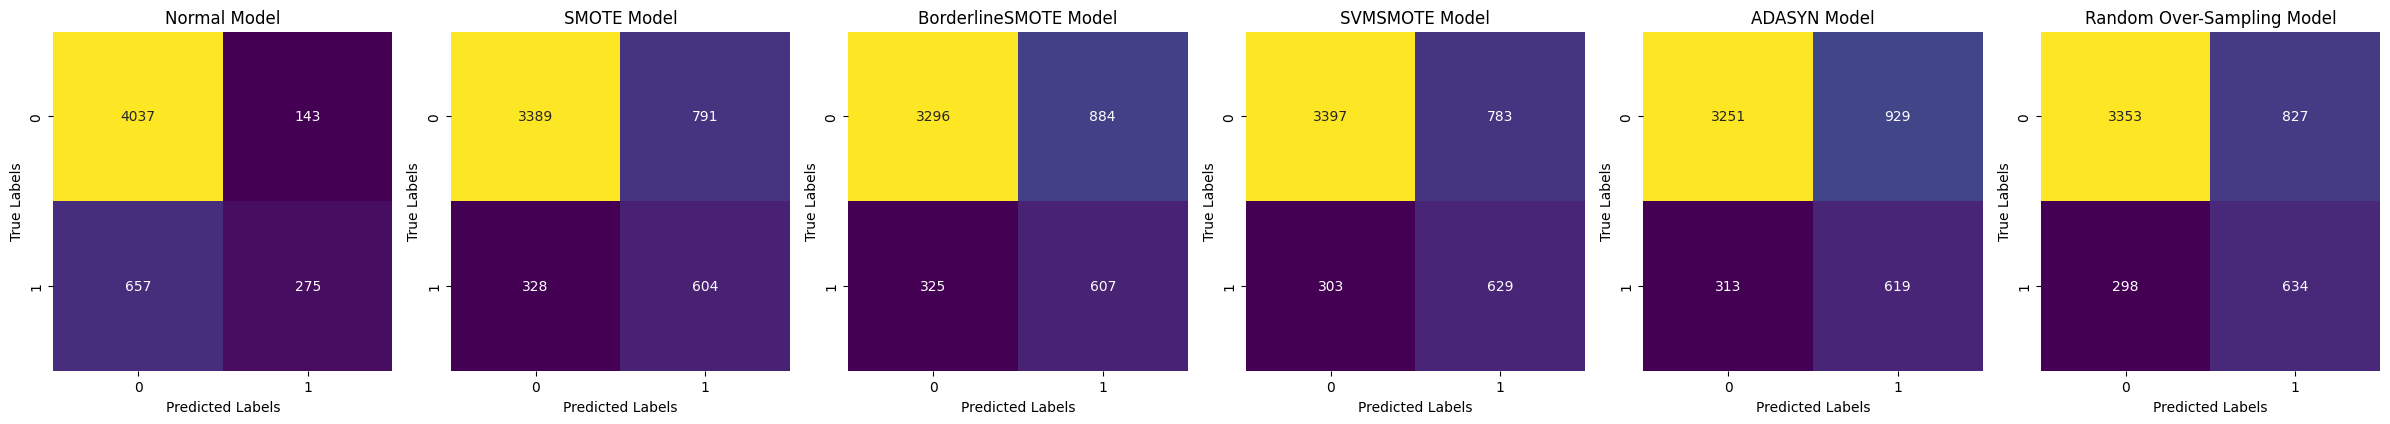

Confusion Matrices for Random Forest:


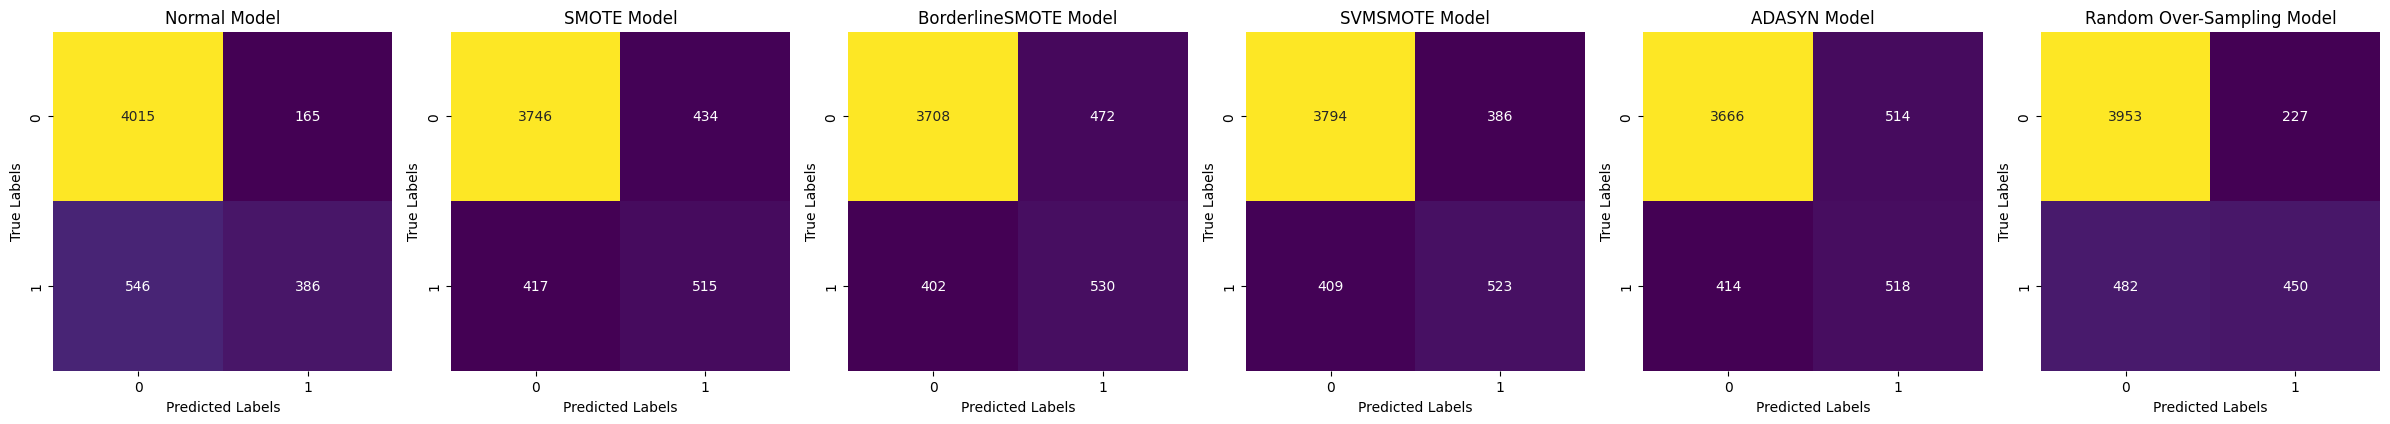

Confusion Matrices for XGBoost:


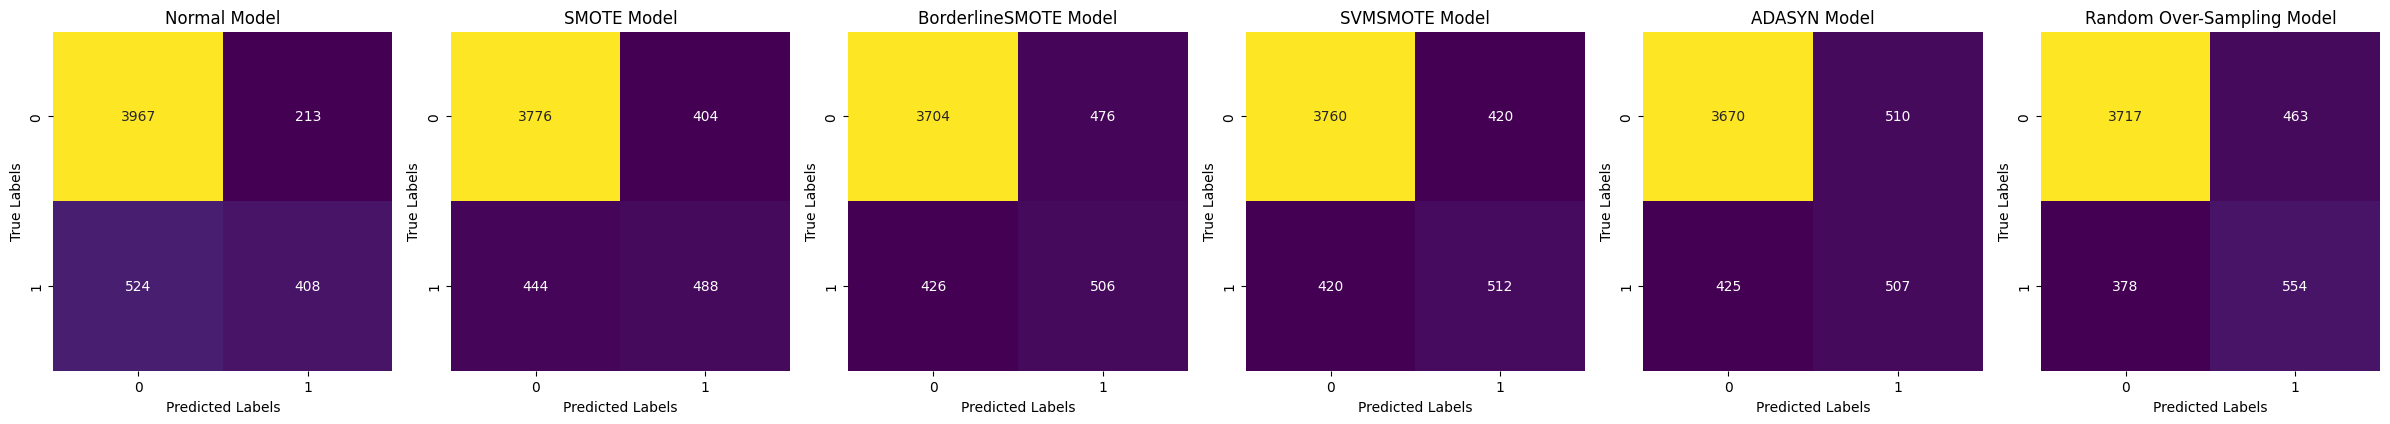

Confusion Matrices for Gradient Boosting:


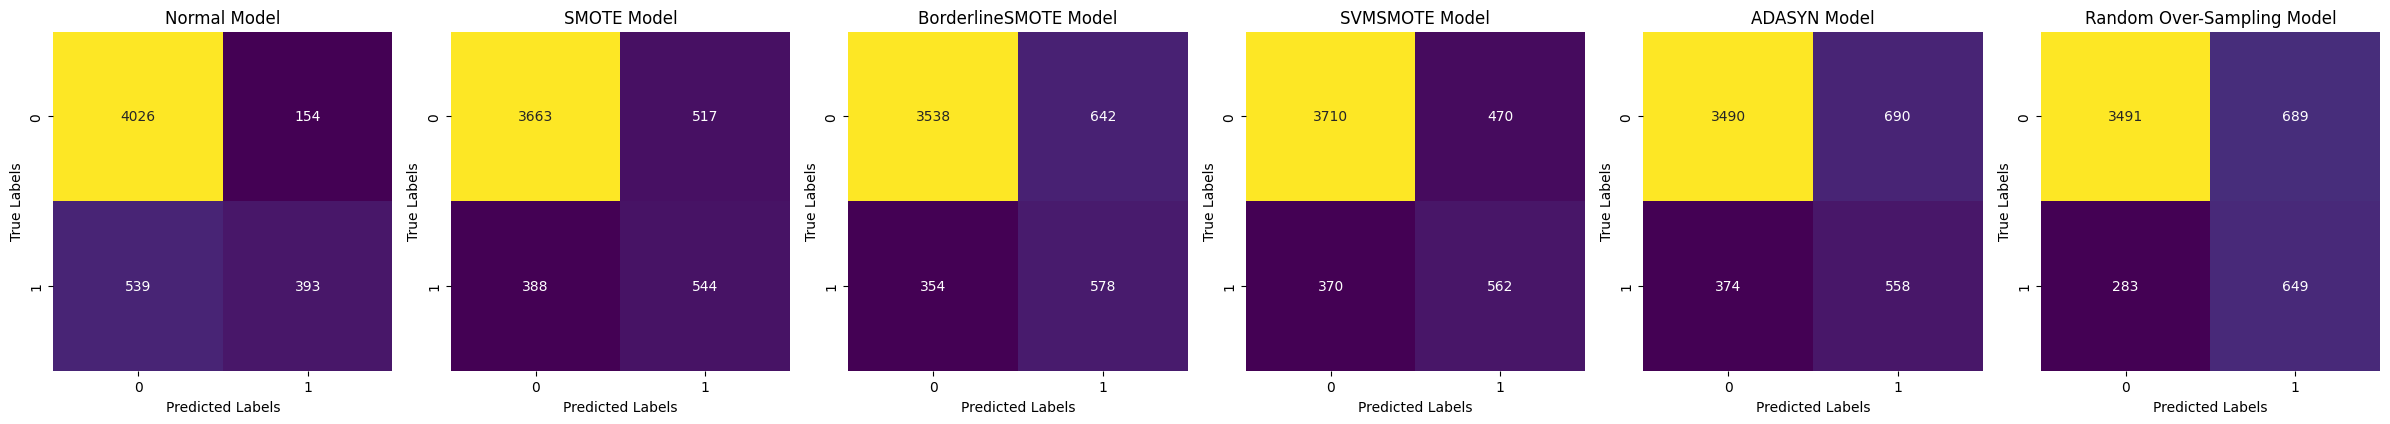

Confusion Matrices for AdaBoost:


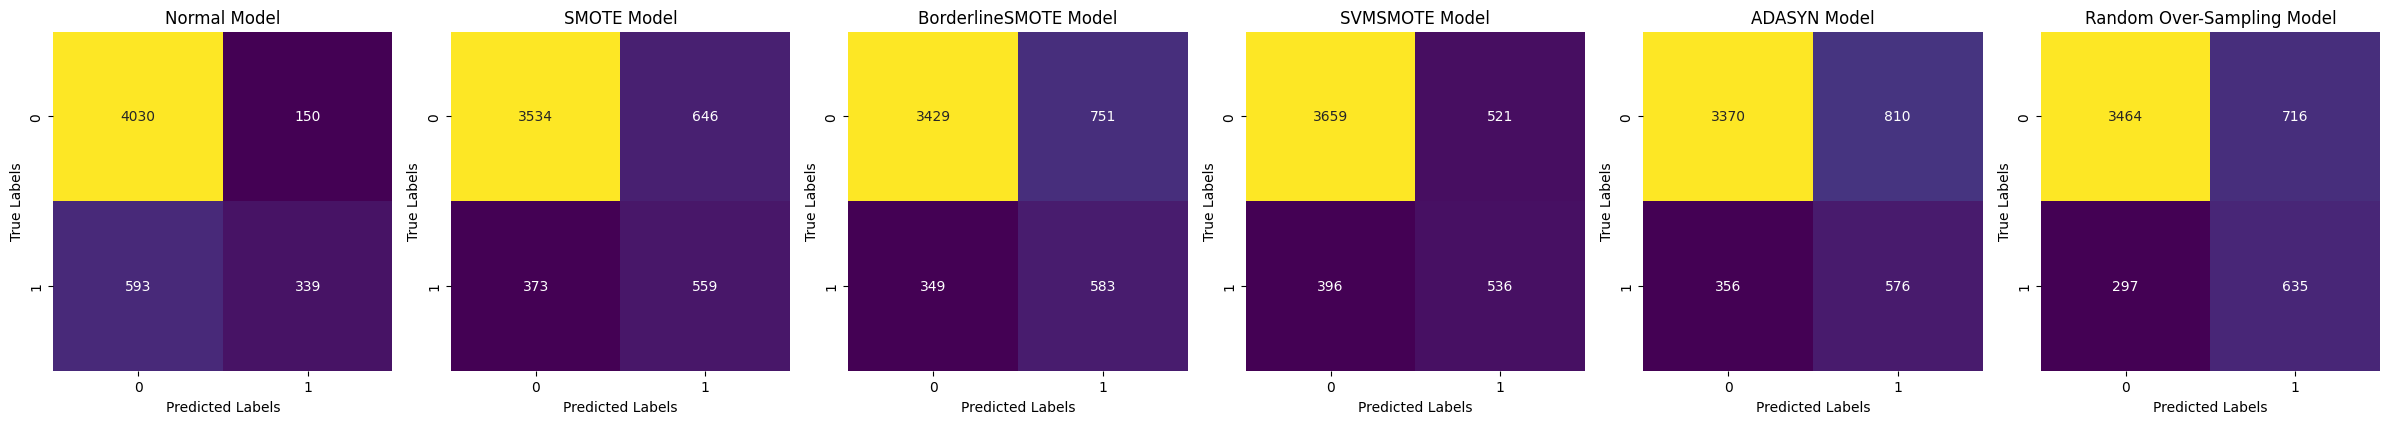

In [130]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Define resampling techniques
resampling_techniques = {
    'Normal': None,
    'SMOTE': SMOTE(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42, kind='borderline-1'),
    'SVMSMOTE': SVMSMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'Random Over-Sampling': RandomOverSampler(random_state=42)
}

# Fit classifiers and calculate confusion matrices
for name, clf in classifiers.items():
    print(f"Confusion Matrices for {name}:")

    # Initialize subplots with square aspect ratio
    fig, axes = plt.subplots(1, 6, figsize=(24, 24))  # Increase height for square plots
    axes = axes.flatten()

    for idx, (technique_name, technique) in enumerate(resampling_techniques.items()):
        if technique is not None:
            # Apply resampling
            X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)
            clf.fit(X_train_resampled, y_train_resampled)
        else:
            # Fit on original data
            clf.fit(X_train, y_train)
            X_test_encoded = X_test  # No resampling applied to the test set

        # Predict and calculate confusion matrix
        y_pred = clf.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Plot confusion matrix without color bar
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", ax=axes[idx], square=True, cbar=False)
        axes[idx].set_title(f"{technique_name} Model")
        axes[idx].set_xlabel("Predicted Labels")
        axes[idx].set_ylabel("True Labels")

    plt.tight_layout()
    plt.show()